In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [2]:
from utils import mean_file

# data

In [14]:
# seqs_idxs = [0]
# seqs_idxs = [1]
# seqs_idxs = [2]
# seqs_idxs = [3]
# seqs_idxs = [4]
# seqs_idxs = [5]
# seqs_idxs = [6]
# seqs_idxs = [7]
# seqs_idxs = [8]
# seqs_idxs = [9]
# seqs_idxs = [10]
# seqs_idxs = [11]
# seqs_idxs = [12]
# seqs_idxs = [13]
# seqs_idxs = [14]
# seqs_idxs = [15]
# seqs_idxs = [16]
# seqs_idxs = [17]
# seqs_idxs = [18]
# seqs_idxs = [19]
# seqs_idxs = [20]

# seqs_idxs = [21]
# seqs_idxs = [22]

seqs_idxs = [0,1,2,3] # 8iVFB_vox10
# seqs_idxs = [4,5,6,7] # Owlii_vox10
# seqs_idxs = [8,9,10,11,12,13,14,15,16,17,18,19]# CTC 11,12bit


In [15]:
xlabel = 'bpp'

ylabel = 'Y-PSNR'
# ylabel = 'YUV-PSNR'
if 21 in seqs_idxs or 22 in seqs_idxs:
    ylabel = 'PSNR'

# data config

In [16]:
# solid
if seqs_idxs==[0]: title = 'longdress_vox10'
if seqs_idxs==[1]: title = 'loot_vox10'
if seqs_idxs==[2]: title = 'redandblack_vox10'
if seqs_idxs==[3]: title = 'soldier_vox10'
    
if seqs_idxs==[4]: title = 'basketball_player_vox10'
if seqs_idxs==[5]: title = 'dancer_vox10'
if seqs_idxs==[6]: title = 'model_vox10'
if seqs_idxs==[7]: title = 'exercise_vox10'

if seqs_idxs==[8]: title = 'basketball_player_vox11'
if seqs_idxs==[9]: title = 'dancer_vox11'

if seqs_idxs==[10]: title = 'Thaidancer_viewdep_vox12'
    
# dense
if seqs_idxs==[11]: title = 'longdress_viewdep_vox12'
if seqs_idxs==[12]: title = 'loot_viewdep_vox12'
if seqs_idxs==[13]: title = 'redandblack_viewdep_vox12'
if seqs_idxs==[14]: title = 'soldier_viewdep_vox12'
if seqs_idxs==[15]: title = 'boxer_viewdep_vox12'
if seqs_idxs==[16]: title = 'Facade_00009_vox12'
if seqs_idxs==[17]: title = 'House_without_roof_00057_vox12'

# sparse
if seqs_idxs==[18]: title = 'Shiva_00035_vox12'
if seqs_idxs==[19]: title = 'Staue_Klimt_vox12'   

# scannet q2cm
if seqs_idxs==[20]: title = 'ScanNet_q2cm'

# lidar q1mm
if seqs_idxs==[21]: title = 'Ford_q1mm'
if seqs_idxs==[22]: title = 'KITTI_q1mm'


if seqs_idxs==[0,1,2,3]: title = '8iVFB_vox10'
if seqs_idxs==[4,5,6,7]: title = 'Owlii_vox10'
# if seqs_idxs==[8,9,10,11]: title = 'Owlii_vox11'
# if seqs_idxs==[13,14,15,16]: title = '8ivfb_vox12'
if seqs_idxs==[8,9,10,11,12,13,14,15,16,17,18,19]: title = 'Average CTC samples 11,12-bit'

In [17]:
print(title)

8iVFB_vox10


# G-PCC

In [18]:
csvdir_list = [
    # solid
    'csvfiles/gpcc/raht21/8ivfb/longdress_vox10_1300.csv',
    'csvfiles/gpcc/raht21/8ivfb/loot_vox10_1200.csv',
    'csvfiles/gpcc/raht21/8ivfb/redandblack_vox10_1550.csv',
    'csvfiles/gpcc/raht21/8ivfb/soldier_vox10_0690.csv',

    'csvfiles/gpcc/raht21/owlii_vox10/basketball_player_vox11_00000200.csv',
    'csvfiles/gpcc/raht21/owlii_vox10/dancer_vox11_00000001.csv',
    'csvfiles/gpcc/raht21/owlii_vox10/model_vox11_00000001.csv',
    'csvfiles/gpcc/raht21/owlii_vox10/exercise_vox11_00000001.csv',

    'csvfiles/gpcc/raht21/owlii_vox11/basketball_player_vox11_00000200.csv',
    'csvfiles/gpcc/raht21/owlii_vox11/dancer_vox11_00000001.csv',
    
    'csvfiles/gpcc/raht21/object_vox12/Thaidancer_viewdep_vox12.csv',

    # dense
    'csvfiles/gpcc/raht21/object_vox12/longdress_viewdep_vox12.csv',
    'csvfiles/gpcc/raht21/object_vox12/loot_viewdep_vox12.csv',
    'csvfiles/gpcc/raht21/object_vox12/redandblack_viewdep_vox12.csv',
    'csvfiles/gpcc/raht21/object_vox12/soldier_viewdep_vox12.csv',

    'csvfiles/gpcc/raht21/object_vox12/boxer_viewdep_vox12.csv',

    'csvfiles/gpcc/raht21/object_vox12/Facade_00009_vox12.csv',
    'csvfiles/gpcc/raht21/object_vox12/House_without_roof_00057_vox12.csv',
    # sparse
    'csvfiles/gpcc/raht21/object_vox12/Shiva_00035_vox12.csv',
    'csvfiles/gpcc/raht21/object_vox12/Staue_Klimt_vox12.csv',

    # scan2cm
    'csvfiles/gpcc/raht21/scan2cm.csv',
    # lidar q1mm
    'csvfiles/gpcc/raht21/ford1mm.csv', 
    'csvfiles/gpcc/raht21/kitti1mm.csv',
]


file_list = [csvdir_list[i] for i in seqs_idxs]

for i, f in enumerate(file_list):print(i+1, f)
df = mean_file(file_list)


x = np.array(df[xlabel+'_att'])[:-1].round(3)
y = np.array(df[ylabel])[:-1].round(3)

print('x', [i for i in x])
print('y', [i for i in y])

gpcc = [x, y]

1 csvfiles/gpcc/raht21/8ivfb/longdress_vox10_1300.csv
2 csvfiles/gpcc/raht21/8ivfb/loot_vox10_1200.csv
3 csvfiles/gpcc/raht21/8ivfb/redandblack_vox10_1550.csv
4 csvfiles/gpcc/raht21/8ivfb/soldier_vox10_0690.csv
x [1.207, 0.598, 0.258, 0.104, 0.037]
y [41.871, 37.933, 34.225, 31.175, 28.626]


# Ours

In [19]:
csvdir_list = [
    # solid
    'csvfiles/ours/8ivfb/longdress_vox10_1300.csv',
    'csvfiles/ours/8ivfb/loot_vox10_1200.csv',
    'csvfiles/ours/8ivfb/redandblack_vox10_1550.csv',
    'csvfiles/ours/8ivfb/soldier_vox10_0690.csv',
    
    'csvfiles/ours/owlii_vox10/basketball_player_vox11_00000200.csv',
    'csvfiles/ours/owlii_vox10/dancer_vox11_00000001.csv',
    'csvfiles/ours/owlii_vox10/model_vox11_00000001.csv',
    'csvfiles/ours/owlii_vox10/exercise_vox11_00000001.csv',
    
    'csvfiles/ours/owlii_vox11/basketball_player_vox11_00000200.csv',
    'csvfiles/ours/owlii_vox11/dancer_vox11_00000001.csv',
    
    'csvfiles/ours/object_vox12/Thaidancer_viewdep_vox12.csv',

    # dense
    'csvfiles/ours/object_vox12/longdress_viewdep_vox12.csv',
    'csvfiles/ours/object_vox12/loot_viewdep_vox12.csv',
    'csvfiles/ours/object_vox12/redandblack_viewdep_vox12.csv',
    'csvfiles/ours/object_vox12//soldier_viewdep_vox12.csv',
    
    'csvfiles/ours/object_vox12/boxer_viewdep_vox12.csv',

    'csvfiles/ours/object_vox12/Facade_00009_vox12.csv',
    'csvfiles/ours/object_vox12/House_without_roof_00057_vox12.csv',

    # sparse
    'csvfiles/ours/object_vox12/Shiva_00035_vox12.csv',
    'csvfiles/ours/object_vox12/Staue_Klimt_vox12.csv',
    
    # scannet q2cm
    'csvfiles/ours/scan2cm.csv',
    
    # lidar q1mm
    'csvfiles/ours/ford1mm.csv', 
    'csvfiles/ours/kitti1mm.csv',
]

file_list = [csvdir_list[i] for i in seqs_idxs]
for i, f in enumerate(file_list):print(i+1, f)
df = mean_file(file_list)
x = np.array(df[xlabel])[:].round(3)
y = np.array(df[ylabel])[:].round(3)

print('x', [i for i in x])
print('y', [i for i in y])

ours = [x, y]

1 csvfiles/ours/8ivfb/longdress_vox10_1300.csv
2 csvfiles/ours/8ivfb/loot_vox10_1200.csv
3 csvfiles/ours/8ivfb/redandblack_vox10_1550.csv
4 csvfiles/ours/8ivfb/soldier_vox10_0690.csv
x [0.984, 0.761, 0.567, 0.363, 0.266, 0.172, 0.117, 0.076, 0.052]
y [42.687, 41.084, 39.408, 37.191, 35.616, 33.84, 32.336, 30.729, 29.466]


# plot

In [20]:
if any([i in seqs_idxs for i in [0,1,2,3,4,5,6,7]]): end = 9
else: end = 10

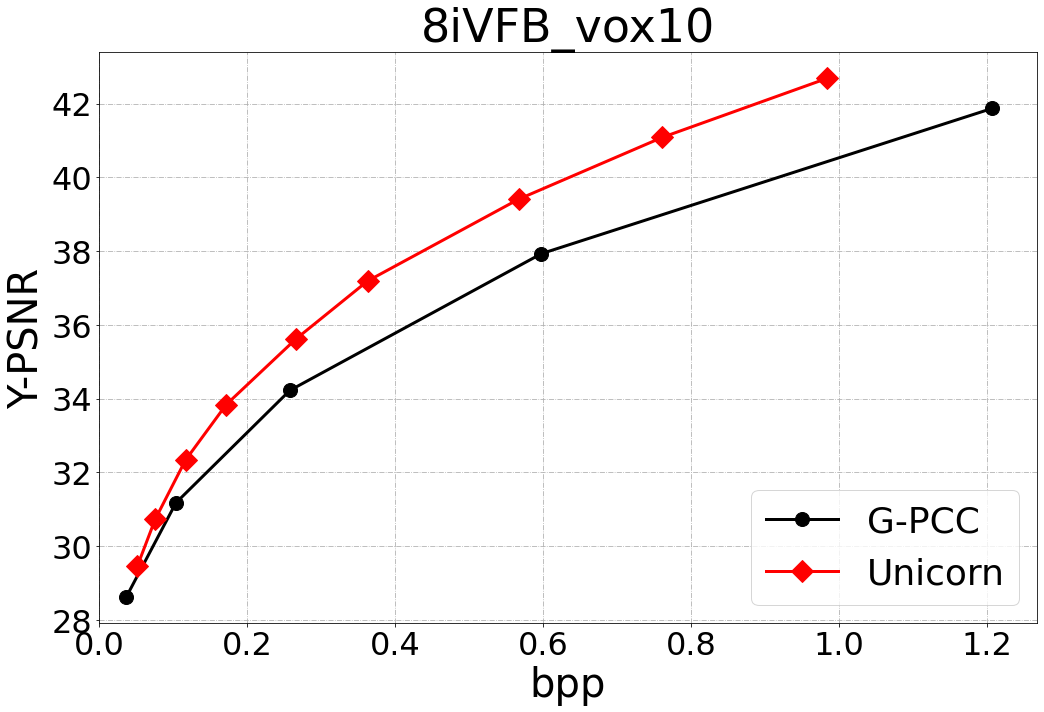

In [21]:
linestyle='solid'
linewidth=3
markersize=14

metric=ylabel

fig, ax = plt.subplots(figsize=(7.3*2,5*2))
prefix = '  '



plt.plot(gpcc[0][:], gpcc[1][:], label='G-PCC', 
         color='black', marker='o', linestyle=linestyle, linewidth=linewidth, markersize=markersize)

plt.plot(ours[0][:end], ours[1][:end], label='Unicorn', 
         color='red', marker='D', linestyle=linestyle, linewidth=linewidth, markersize=markersize+1)


plt.xlim(0, max(max(gpcc[0]), max(ours[0]))*1.05)

ax.locator_params(axis='x', nbins=10)
ax.locator_params(axis='y', nbins=12)
plt.tick_params(labelsize=32)
plt.xlabel(xlabel, fontdict={'size':40})

if metric=='PSNR': plt.ylabel('Reflectance-'+metric, fontdict={'size':40})
else: plt.ylabel(metric, fontdict={'size':40})

plt.title(title, fontdict={'size':46})
plt.grid(ls='-.')
plt.legend(loc='lower right', ncol=1, prop={'size':36})

fig.tight_layout()
os.makedirs('figs/', exist_ok=True)
fig.savefig( os.path.join('figs/', title+'_'+metric+'.pdf'))